# Missing data

Feature Engineering is used to handle missing data

Types of missing data

1) Missing Completely at Random,MCAR : Prob of missing is same for all observations. No relationsp b/w data missing and other values. 

2)Missing data Not At Random, MNAR : Some relationsp b/w data missing and other values

3)Missing At Random,MAR :some sensitive info can be hidden(eg:salary,age,smoking habits)

Techniques to handle missing data

1)Mean/Median/Mode imputation

2)Random Sample Imputation

3)Capturing Nan values with a new feature

4)End of distribution

5)Arbitrary imputation

6)Frequent categoties imputation

In [2]:
import pandas as pd

In [5]:
df= pd.read_csv('titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
import numpy as np
df['cabin_null']= np.where(df['Cabin'].isnull(), 1,0)
df['cabin_null'].mean()



0.7710437710437711

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [23]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Mean/Mode Imputation

Assumes that data are MCAR. Replace NaN values by most frequent occurences of the variable

Advantages

1)Easy to implement(robust to outliers)

2)Faster wayt o obtain the complete dataset

Disadvantages

1)changes the std deviation

2)affects correlation

In [24]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [47]:
 def impute_nan(df,variable,median):
        df[variable+"_median"]=df[variable].fillna(median)

In [52]:
median=df.Age.median()
median

28.0

In [58]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [60]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

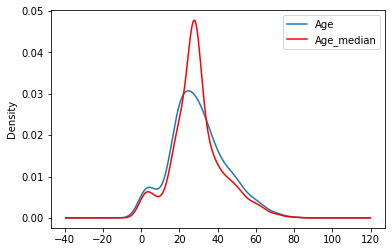

In [63]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Random Sample Imputation

Consists of taking random obs from dataset and use it to replace Nan values

When to use?

Assumes data are MCAR

Advantages

1)Easy to implement
2)Less distortion in variance

Disadvantages

1)wont work in all situations


In [65]:
import pandas as pd

In [69]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [89]:
df.isnull()

,Survived,Age,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [71]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [88]:
df.Age.dropna().sample(df['Age'].isnull().sum(),random_state=0)
##df['Age'].dropna()

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [93]:
def impute_nan(df,variable,median):
    df[variable+'median']= df[variable].fillna(median)
    df[variable+'random']=df[variable]
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'random']=random_sample
    

In [94]:
median=df.Age.median()
median

28.0

In [95]:
impute_nan(df,'Age',median)

In [96]:
df.head()

,Survived,Age,Fare,Agemedian,Agerandom
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


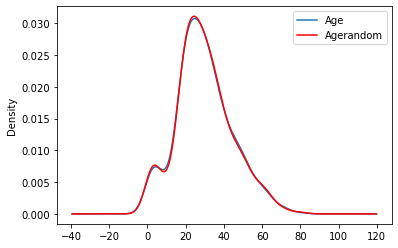

In [97]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Agerandom.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#  Capturing Nan values with a new feature

used when data are not missing completely at random

Advantages

1)Easy to implement

2)Captures the importance of missing values

Disadvantages

1)creates additional features (curse of dimensionality)

In [98]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [100]:
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [101]:
df.Age.median()

28.0

In [104]:
df.Age.fillna(df.Age.median(),inplace=True)

In [105]:
df.head(50)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# End of distribution Imputation



In [108]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [114]:
mean=df.Age.mean()
mean

29.69911764705882

<AxesSubplot:>

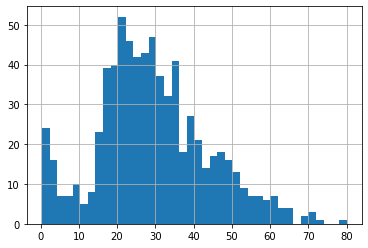

In [112]:
df.Age.hist(bins=40)

In [117]:
extreme=mean+3*df.Age.std()

C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

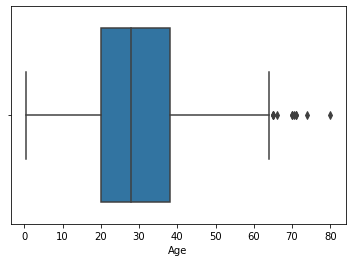

In [116]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [118]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_of_dist']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
    

In [119]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [120]:
df.head()

,Survived,Age,Fare,Age_end_of_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

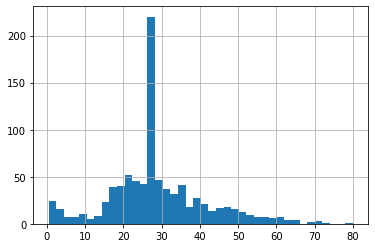

In [121]:
df['Age'].hist(bins=40)

<AxesSubplot:>

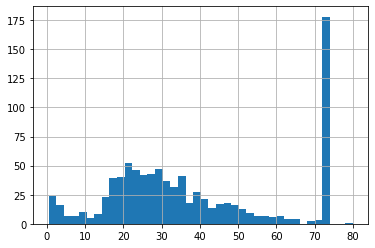

In [122]:
df['Age_end_of_dist'].hist(bins=40)

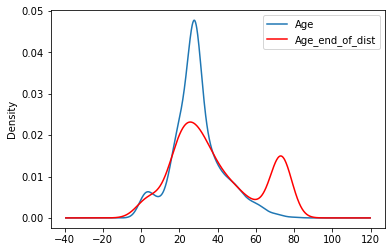

In [123]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_end_of_dist.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_of_dist'>

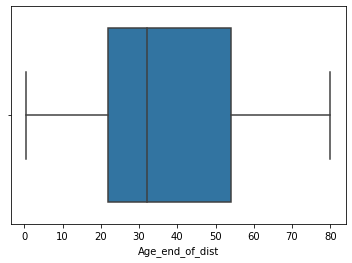

In [124]:
sns.boxplot('Age_end_of_dist',data=df)

# Arbitrary value Imputation

Replaces Nan value with any arbitrary value. This arbitrary value should not be more frequntly present. Usually take least or highest outliers

Advantages

1)easy to implement
2)captures the importance of missingness if there is one

Disadvantages

1)Distorts the original dist of tge variable
2)hard to decide which value to use

In [4]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

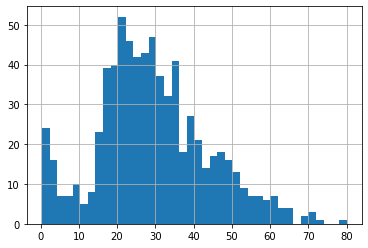

In [5]:
 df.Age.hist(bins=40)

In [6]:
def impute_nan(df,variable):
    df[variable+'_100']=df[variable].fillna(100)

In [8]:
impute_nan(df,'Age')
df.head(50)

,Survived,Age,Fare,Age_100
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,100.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


# How to handle categorical missing values



### 1)Frequent category Imputation

Missing values replaced by frequent category

Advantages
1)Easy and fast to implement

Disadvantages
2)if missing value proportion is higher, it will distort the distribution. missing values will be overrepresented

In [11]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [15]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:xlabel='BsmtQual'>

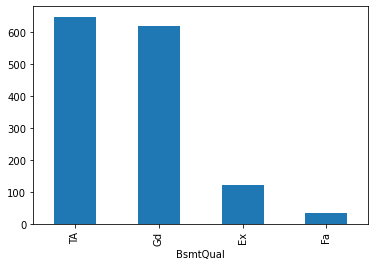

In [22]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar() 

<AxesSubplot:>

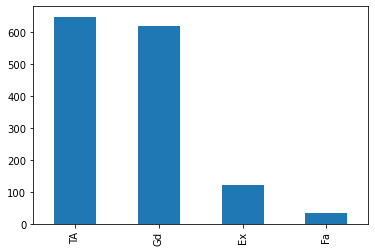

In [23]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

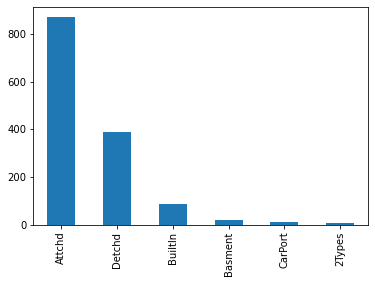

In [24]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

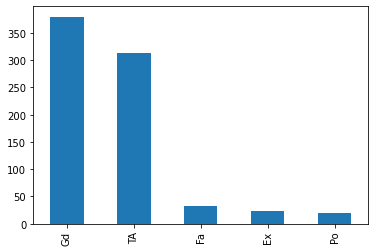

In [26]:
 df['FireplaceQu'].value_counts().plot.bar()

In [42]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [44]:
df['GarageType'].mode()[0]

'Attchd'

In [48]:
def impute_nan(df,variable):
    #most_frequent_cat=df[variable].value_counts().index[0]
    most_frequent_cat=df[variable].mode()[0]
    df[variable].fillna(most_frequent_cat,inplace=True)
    

In [49]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [50]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [51]:
df.head(50)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


### 2)Adding a variable to capture Nan

Here a new variable is added to capture the importance of Nan values and then Nan values are replaced by most frequent values 

As importance of missingness is captured this methos can be used when there are alot of Nan values

But curse od dimensionality is an issue

There are two ways this can be done 1)by replacing with 1s and 0s 2)replacing with missing category

In [60]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)


In [62]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [65]:
frequent = df['BsmtQual'].mode()[0]

In [67]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [68]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [69]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Another technique (repalcing with missing category)
most used technique

In [85]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [86]:
def impute_nan(df,variable):
    df[variable+'_new_cat']=np.where(df[variable].isnull(),'missing',df[variable])
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [87]:
 df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_cat,FireplaceQu_new_cat,GarageType_new_cat
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [89]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [90]:
df.head()

,SalePrice,BsmtQual_new_cat,FireplaceQu_new_cat,GarageType_new_cat
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
